## Coronavirus (COVID-19) ETL & Plotting
### This is the version that use JHU data instead of  API

(Please find the other notebook to check the old one)

(Read the notebook in view mode: https://nbviewer.jupyter.org/)


### Setting Environment

In [1]:
## Load Basic Package 
print('PYTHON & PACKAGE VERSION CONTROL')
print('----------')
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))
import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))
import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix

#misc libraries
import random
import time
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

print('----------')
# This set pandas to show all the rows and columns through jupter notebook
# Don't know why but sometimes would seriously slow down the run!!
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

# This set pandas not to show scientific notation (but most of the time should assign columns as integer!)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# original
# pd.set_option('display.max_columns', 15)
# pd.set_option('display.max_rows', 15)

## If want to use dark theme, go to terminal and execute 'jt -t chesterish'

PYTHON & PACKAGE VERSION CONTROL
----------
Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.1
matplotlib version: 3.1.3
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.12.0
scikit-learn version: 0.22.1
----------


## ETL: JHU github
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

###### old  API
Free API: https://www.reddit.com/r/datasets/comments/fi5uys/a_free_api_for_data_on_the_corona_virus/

In [3]:
# data_path = r'C:\Users\ADMIN\Desktop\Python\Project_coronavirus'
# data_file = 'time_series_19-covid-Confirmed.csv'

# data_set = pd.read_csv(data_path+'/'+data_file)
# df = data_set.copy()
# print('Complete loading df!')
# df.head()

In [4]:
## test: load from github
data_path = r'C:\Users\ADMIN\Desktop\Python\Project_coronavirus'
# data_file = 'time_series_19-covid-Confirmed.csv'
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
data_url_new = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

data_set = pd.read_csv(data_url_new)
df = data_set.copy()
print('Complete loading df!')
df.head()


Complete loading df!


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306,1306.0


In [184]:
### try fix the data reading
def jhu_data_process_date(jhu_data):
    #fix the country name
    jhu_data['Country/Region'] = jhu_data['Country/Region'].replace({'Korea, South': 'South Korea',
                                                                     'Taiwan*': 'Taiwan', 'US': 'United States'})
    jhu_data1 = jhu_data.set_index('Country/Region')
    df_country = jhu_data1
    #special fix for different level rows
    df_country.insert(loc=1, column="Country_level", value=0)
    duplicated = ~df_country.index.duplicated(keep=False)
    df_country['Country_level'] = duplicated.astype(int)
    df_country['index col'] = df_country.index
    special_rows = df_country[df_country['Country_level'] == 0]
#     special_rows = special_rows[-special_rows['Province/State'].str.contains(', ')] # special fix for US # no longer need!
    #build date index
    date_list = list(special_rows.columns)[4:-1]
    #sum up the value from lower level
    try: 
        agg_special_rows = special_rows.pivot_table(values = date_list, index = 'index col', aggfunc = np.sum)[date_list]
        df_country2 = df_country[df_country['Country_level'] == 1]
        df_country2.drop(['Province/State','Country_level','Lat', 'Long', 'index col'], axis=1, inplace=True)
        final_country_df = pd.concat([df_country2, agg_special_rows]).T
    except:
        df_country2 = df_country[df_country['Country_level'] == 1]
        df_country2.drop(['Province/State','Country_level','Lat', 'Long', 'index col'], axis=1, inplace=True)
        final_country_df = df_country2.T
    final_country_df.index = pd.to_datetime(final_country_df.index)
    return final_country_df

jhu_data_process_date(df).head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Central African Republic,Chad,Chile,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,South Korea,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,Uruguay,United States,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,The West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Australia,Canada,China,Denmark,France,Netherlands,United Kingdom
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,2,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,3,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,0,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,2075,0,3,0,0


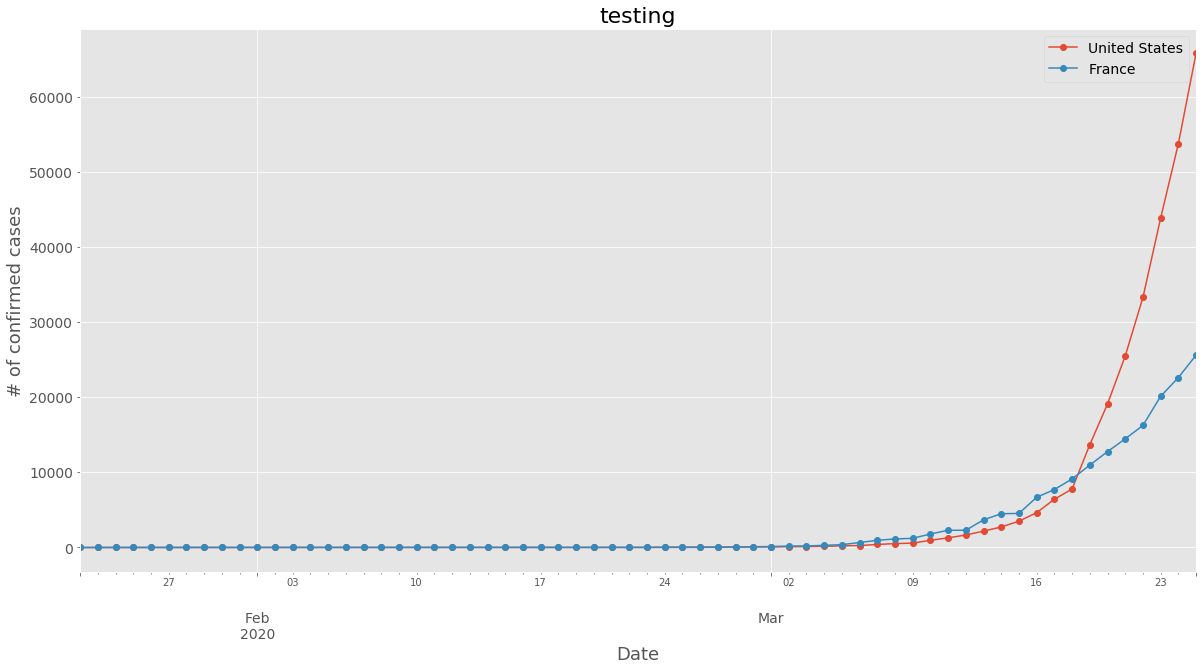

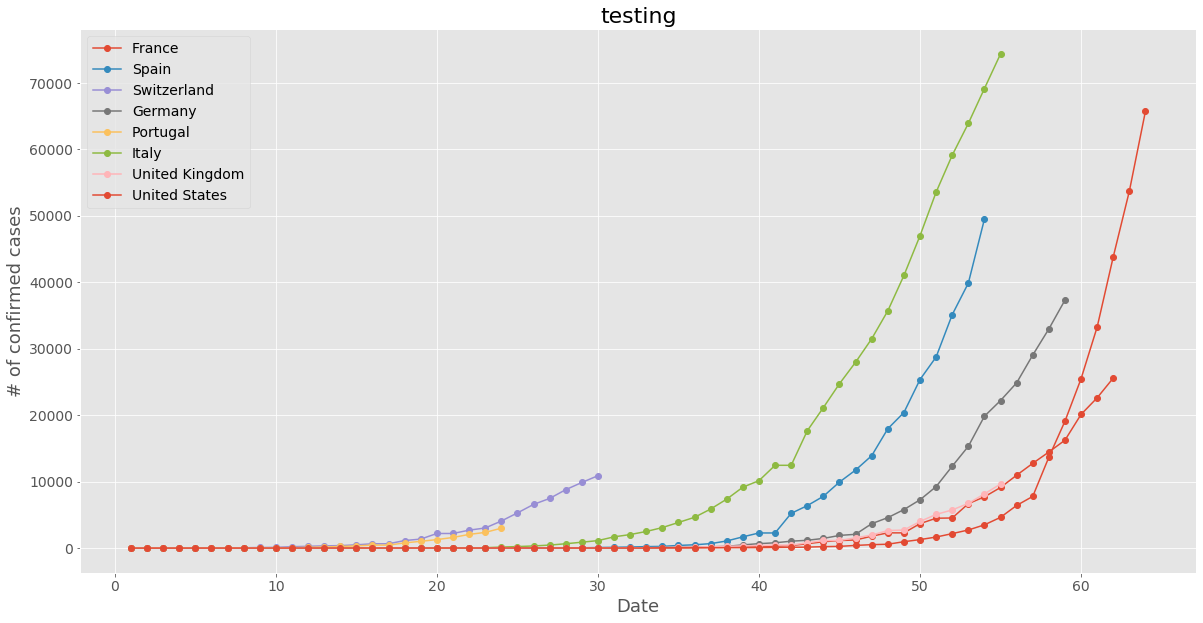

In [185]:
def create_trend_line2(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, marker='o')
#     plt.yscale('log')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('# of confirmed cases', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=14)
#     fig.savefig(os.path.join(image_dir, create_save_file(col, country, 'trendline')))
    return 

# ax.get_figure()
# font = {'weight': 'bold','size': 25}
# plt.rc('font', **font)

plt.style.use('ggplot')
# plt.style.use('seaborn-talk')
europe_country = ['France', 'Spain', 'Switzerland',
                  'Germany', 'Portugal', 'Italy', 'United Kingdom', 'United States']
create_trend_line2(jhu_data_process_date(df), ['United States','France'], 'testing')
create_trend_line2(jhu_data_process_day(jhu_data_process_date(df)), europe_country, 'testing')

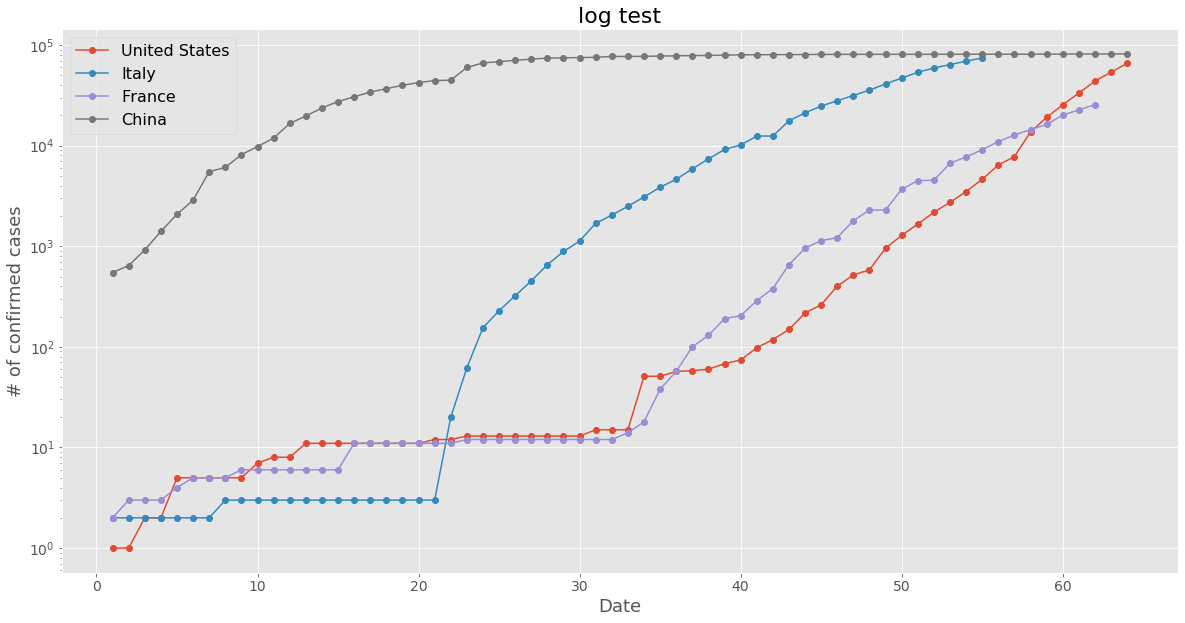

In [119]:
dff = jhu_data_process_day(jhu_data_process_date(df, country_list))

def create_trend_line_log(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, marker='o')
    plt.yscale('log')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('# of confirmed cases', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
    return 

create_trend_line_log(dff, ['United States','Italy','France', 'China'], 'log test')
# np.log(dff)
# dff


In [120]:
## Population data
data_path = r'C:\Users\ADMIN\Desktop\Python\Project_coronavirus'
data_file = 'Country_Population.csv'
pop_data = pd.read_csv(data_path + '/' + data_file, usecols=['Country', 'Population'])
pop_df = pop_data.copy()
pop_df['Population'] = pop_df['Population'].str.replace(',', '').astype(int)
country_pop_dict = pop_df.set_index('Country').to_dict('dict')['Population']

print('Complete making dict')

Complete making dict


In [166]:
def data_process_avg(complete_df):
    for c in list(complete_df.columns):
        try:
            complete_df[c] = round(complete_df[c]/country_pop_dict.get(c)*1000000, 3)
        except:
            complete_df[c+'_no_pop_value'] = complete_df[c]
    return complete_df

data_process_avg(jhu_data_process_date(df))

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Central African Republic,Chad,Chile,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,South Korea,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,Uruguay,United States,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,The West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Australia,Canada,China,Denmark,France,Netherlands,United Kingdom,Congo (Brazzaville)_no_pop_value,Congo (Kinshasa)_no_pop_value,Cote d'Ivoire_no_pop_value,Diamond Princess_no_pop_value,Czechia_no_pop_value,Saint Vincent and the Grenadines_no_pop_value,The West Bank and Gaza_no_pop_value,Saint Kitts and Nevis_no_pop_value
2020-01-22,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0,0.000,0,0.000,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.016,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.042,0.000,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.381,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0
2020-01-23,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0,0.000,0,0.000,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.016,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,0.000,0.171,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.042,0.000,0.043,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.021,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.447,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0
2020-01-24,0.000

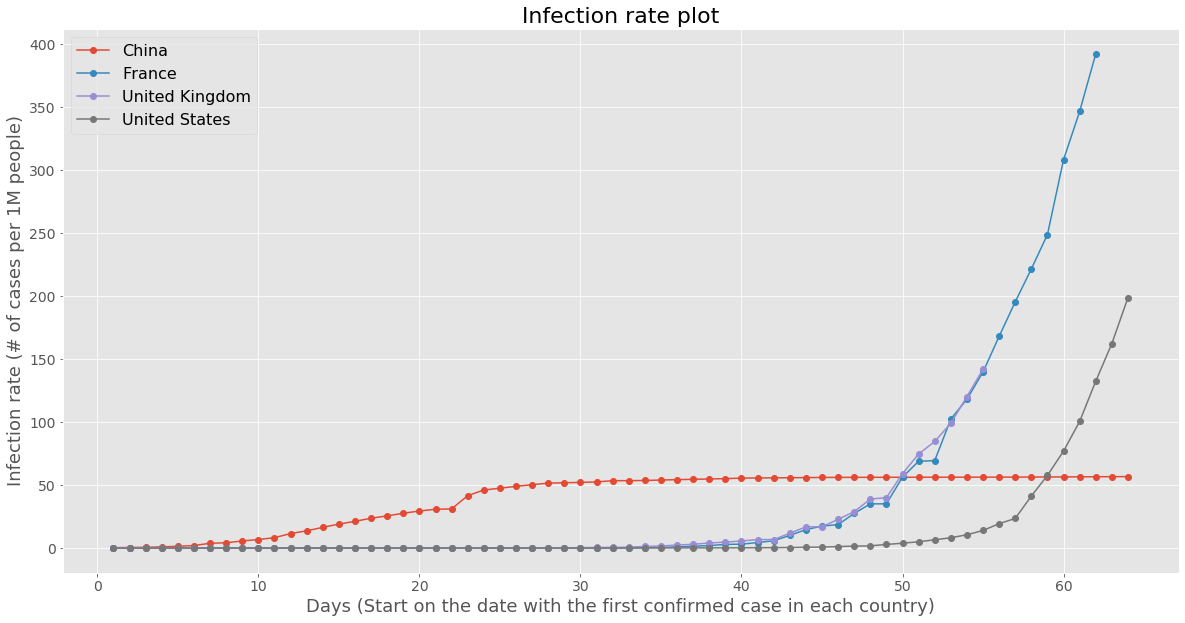

In [167]:
### Infection rate plot

def create_trend_line_infection_rate_day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, marker='o')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('Days (Start on the date with the first confirmed case in each country)', fontsize=18)
    plt.ylabel('Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
    return 

create_trend_line_infection_rate_day(data_process_avg(jhu_data_process_day(jhu_data_process_date(df))), 
                   ['China', 'France', 'United Kingdom', 'United States'], 
                   'Infection rate plot')


# create_trend_line2(data_process_avg(jhu_data_process_day(jhu_data_process_date(df, country_list))), 
#                    ['China', 'France', 'United Kingdom', 'United States'], 
#                    'Infection rate plot')

# data_process_avg(jhu_data_process_date(df, country_list))

In [123]:
## daily increase df

def jhu_data_process_day_specific(date_df, day_threshold):
    country_arrays = [np.array(date_df[c])[np.array(date_df[c]) > day_threshold] for c in date_df.columns]
    day_df = pd.DataFrame(country_arrays).T
    day_df.columns = list(date_df.columns)
    day_df.index += 1 
    # calculate daily increase
    temp_df = day_df.diff(periods=1)
    series_list = [temp_df[c].shift(-1)[temp_df[c].shift(-1) > 0].reset_index(drop=True) for c in temp_df.columns]
    daily_increase_df = pd.DataFrame(series_list).T
    daily_increase_df.index = daily_increase_df.index + 1
    return daily_increase_df

def jhu_data_process_2day_specific(date_df, day_threshold):
    country_arrays = [np.array(date_df[c])[np.array(date_df[c]) > day_threshold] for c in date_df.columns]
    day_df = pd.DataFrame(country_arrays).T
    day_df.columns = list(date_df.columns)
    day_df.index += 1 
    # calculate daily increase
    temp_df = day_df.diff(periods=1)
    series_list = [temp_df[c].shift(-1)[temp_df[c].shift(-1) > 0].reset_index(drop=True) for c in temp_df.columns]
    daily_increase_df = pd.DataFrame(series_list).T
    daily_increase_df.index = daily_increase_df.index + 1
    ## make it do the average of 2 days
    # sum up 2 days
    list_list = [[round((daily_increase_df[c][n]+daily_increase_df[c][n+1])/2) 
                             for n in range(1,len(daily_increase_df)) if n % 2 == 1] for c in daily_increase_df.columns]
    avg_2day_increase_df = pd.DataFrame(list_list, index = list(daily_increase_df.columns)).T
    return avg_2day_increase_df

## This is for bigger number
## Just leave it for now. Too many things to be considered (should change the interval based on each case)
def jhu_data_process_3day_specific_moving(date_df, day_threshold):
    country_arrays = [np.array(date_df[c])[np.array(date_df[c]) > day_threshold] for c in date_df.columns]
    day_df = pd.DataFrame(country_arrays).T
    day_df.columns = list(date_df.columns)
    day_df.index += 1 
    # caluculate daily increase
    temp_df = day_df.diff(periods=1)
    series_list = [temp_df[c].shift(-1)[temp_df[c].shift(-1) > 0].reset_index(drop=True) for c in temp_df.columns]
    daily_increase_df = pd.DataFrame(series_list).T
    daily_increase_df.index = daily_increase_df.index + 1
    # calculate daily increase with moving average of 2 days
    list_list = [np.convolve(daily_increase_df[c], np.ones((3,))/3, mode='valid') for c in daily_increase_df.columns]
    avg_2day_increase_df = pd.DataFrame(list_list, index = list(daily_increase_df.columns)).T
    return avg_2day_increase_df

# np.convolve(jhu_data_process_date(df, europe_country)['United States'], np.ones((2,))/2, mode='valid')

# jhu_data_process_3day_specific_moving(jhu_data_process_date(df, country_list), 100)

# jhu_data_process_2day_specific(jhu_data_process_date(df, country_list), 100)

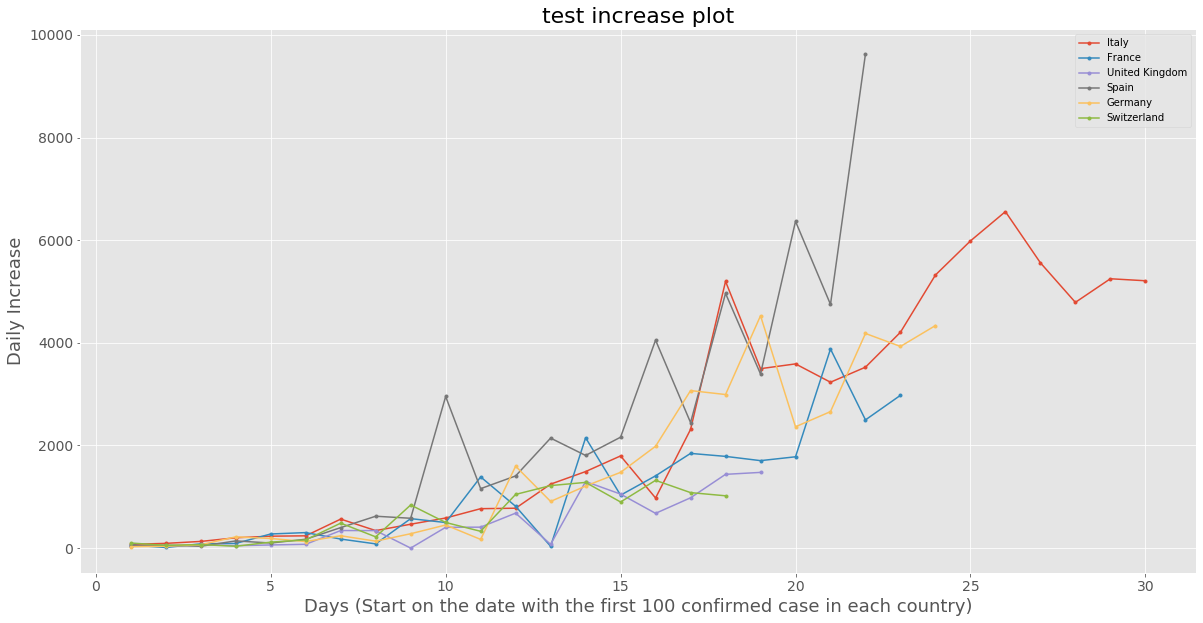

In [168]:
## daily increase cases plot!
def create_trend_line_daily_increase(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, kind='line', marker='.')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('Days (Start on the date with the first 100 confirmed case in each country)', fontsize=18)
    plt.ylabel('Daily Increase', fontsize=18)
#     plt.yscale('log')
    ax.tick_params(labelsize=14)
    return 

create_trend_line_daily_increase(jhu_data_process_day_specific(jhu_data_process_date(df), 100), 
                                 ['Italy', 'France', 'United Kingdom', 'Spain', 'Germany','Switzerland'], 
                                 'test increase plot')

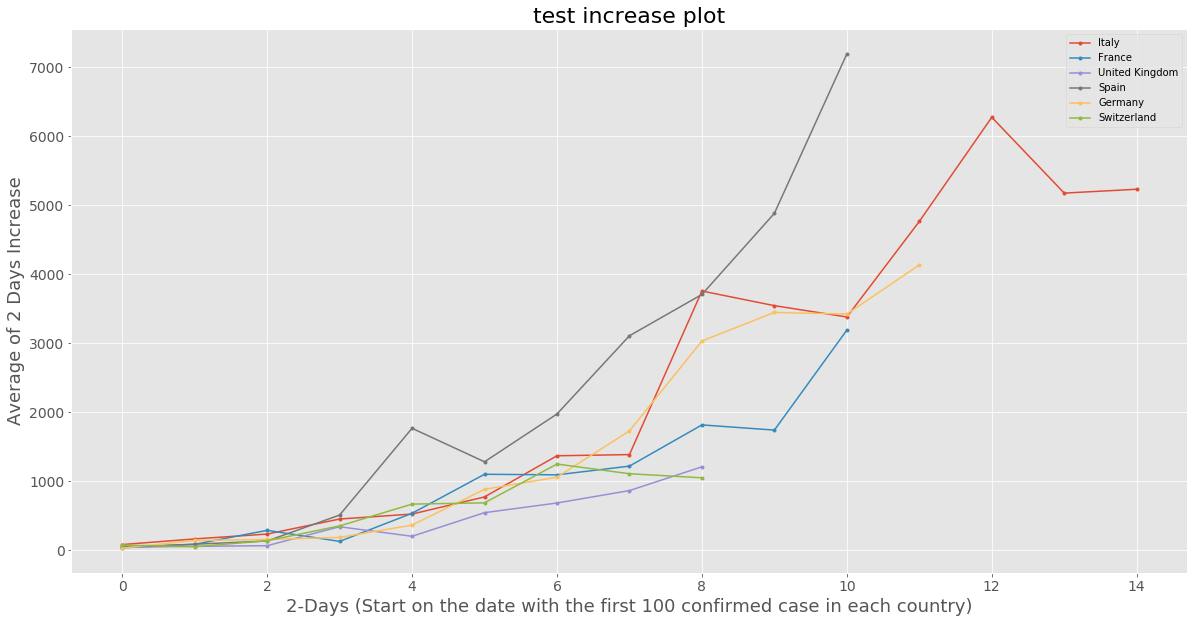

In [170]:
## daily increase cases plot!
def create_trend_line_2day_increase(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, kind='line', marker='.')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Days (Start on the date with the first 100 confirmed case in each country)', fontsize=18)
    plt.ylabel('Average of 2 Days Increase', fontsize=18)
#     plt.yscale('log')
    ax.tick_params(labelsize=14)
    return 

create_trend_line_2day_increase(jhu_data_process_2day_specific(jhu_data_process_date(df), 100), 
                                 ['Italy', 'France', 'United Kingdom', 'Spain', 'Germany','Switzerland'], 
                                 'test increase plot')

In [126]:
def data_process_avg(complete_df):
    for c in list(complete_df.columns):
        complete_df[c] = round(complete_df[c]/country_pop_dict.get(c)*1000000, 3)
    return complete_df

# data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df, country_list), 100))

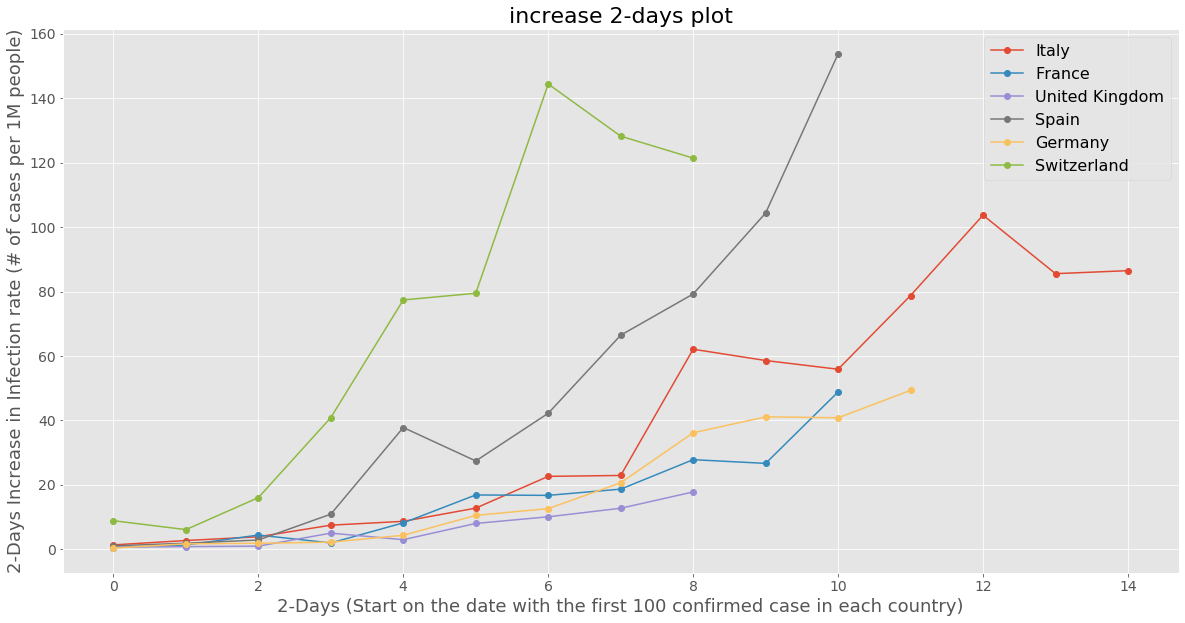

In [171]:
def create_trend_line_infection_rate_2day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, marker='o')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Days (Start on the date with the first 100 confirmed case in each country)', fontsize=18)
    plt.ylabel('2-Days Increase in Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
    return 
create_trend_line_infection_rate_2day(data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df), 100)),
                                     ['Italy', 'France', 'United Kingdom', 'Spain', 'Germany','Switzerland'], 
                                 'increase 2-days plot')

## Plotting for the article


In [128]:
jhu_data_process_date(df, country_list)['China'] 

2020-01-22      548
2020-01-23      643
2020-01-24      920
2020-01-25     1406
2020-01-26     2075
              ...  
2020-03-21    81305
2020-03-22    81435
2020-03-23    81498
2020-03-24    81591
2020-03-25    81661
Name: China, Length: 64, dtype: int64

18283.0

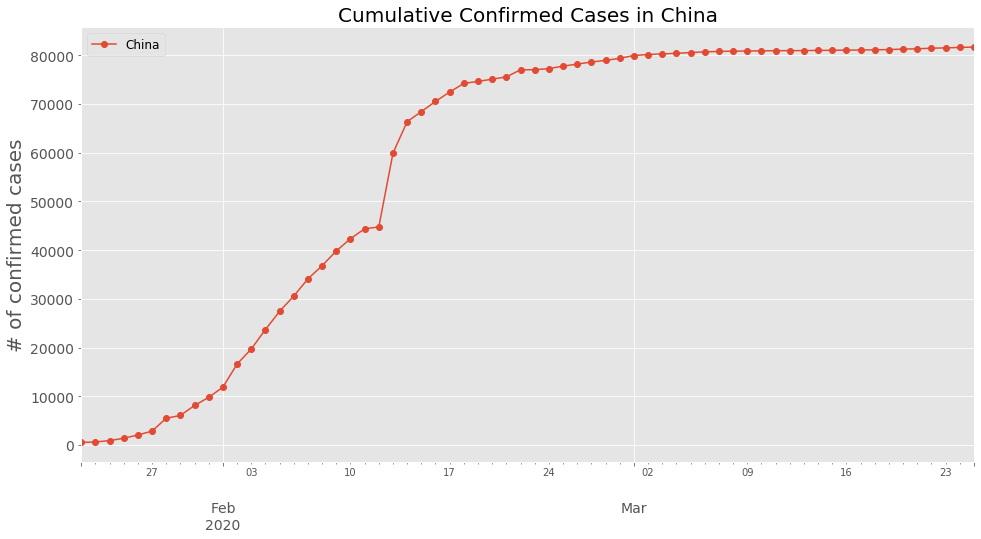

In [172]:
import matplotlib.dates as mdates

#China confirmed count
def create_trend_line2(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(16,8))
    tmp_df[country].plot(ax=ax, marker='o')
    ax.set_title(fig_title, fontsize=20)
    plt.xlabel('', fontsize=20)
    plt.ylabel('# of confirmed cases', fontsize=20)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
#     ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d"))
    plt.legend(fontsize=12)
    left, right = plt.xlim()
    return left
# create_trend_line2(tmp_df, country, fig_title)

# jhu_data_process_date(df, country_list)
create_trend_line2(jhu_data_process_date(df), ['China'], 'Cumulative Confirmed Cases in China')
# create_trend_line2(jhu_data_process_day(jhu_data_process_date(df, country_list)), country_list, 'testing')

# left, right = plt.xlim()

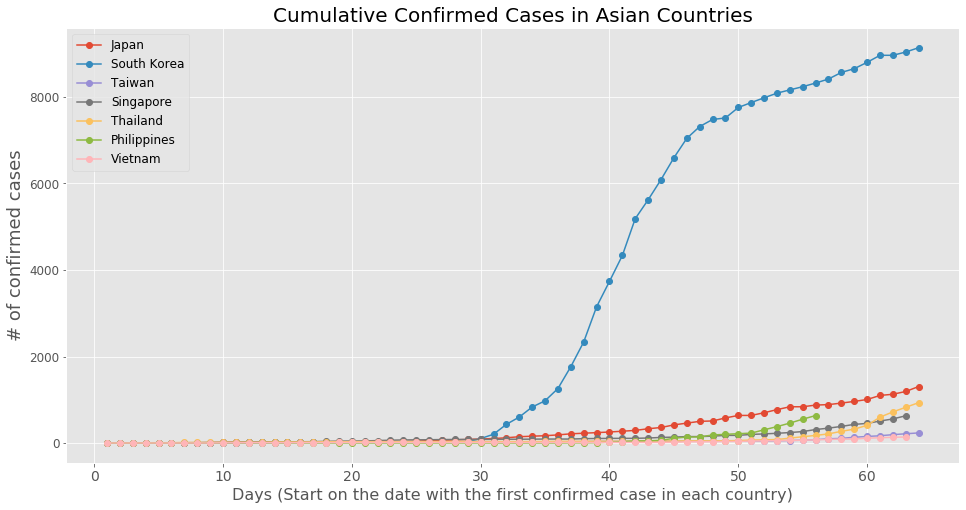

In [174]:
## Cumulative # no use
asia_country = ['Japan', 'South Korea','Taiwan', 'Singapore', 'Thailand', 'Philippines', 'Vietnam']
# plot for other asian countries
def create_trend_line2(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(16,8))
    tmp_df[country].plot(ax=ax, marker='o')
    ax.set_title(fig_title, fontsize=20)
    plt.xlabel('Days (Start on the date with the first confirmed case in each country)', fontsize=16)
    plt.ylabel('# of confirmed cases', fontsize=18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=12)
    plt.legend(fontsize=12)
    return 

create_trend_line2(jhu_data_process_day(jhu_data_process_date(df)),
                   asia_country, 'Cumulative Confirmed Cases in Asian Countries')

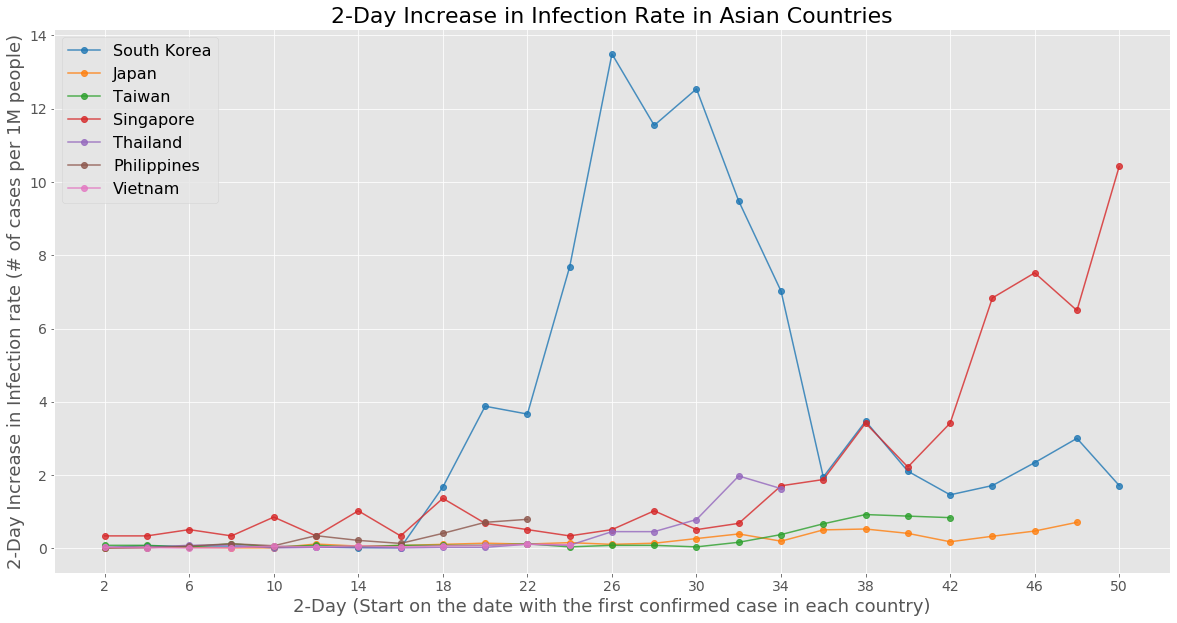

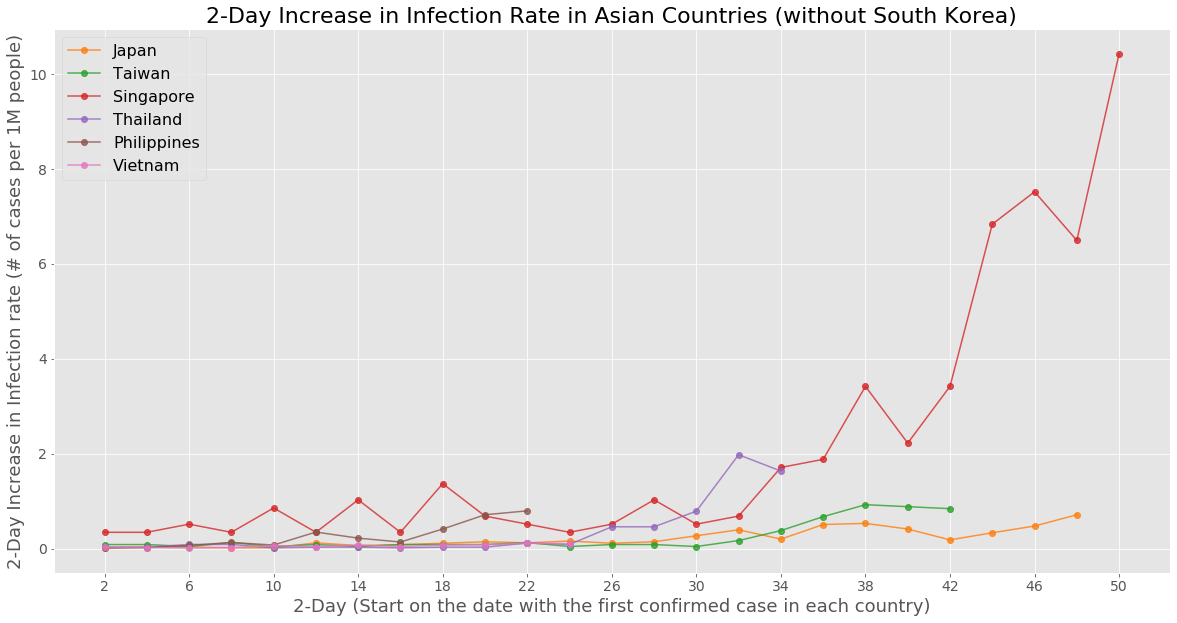

In [175]:
## try outt 2  
def create_trend_line_infection_rate_2day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    # color (must put before the plotting!)
    NUM_COLORS = 10
    cm = plt.get_cmap('tab10')
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    # plotting
    tmp_df[country].plot(ax=ax, marker='o', alpha=0.8)
    # highlight
#     tmp_df['United States'].plot(color='blue', linewidth=3, marker='o',alpha=0.7)
#     plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Day (Start on the date with the first confirmed case in each country)', fontsize=18)
    plt.ylabel('2-Day Increase in Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
#     control the x tick frequency and range
    x_range = [n for n in range(2,54) if (n+2) % 4 == 0] # [2, 6, 10, 14, 18, 22, 26]
    plt.xticks(np.arange(28), x_range)
    plt.locator_params(axis='x', nbins=14)
#     fig.savefig('plot_asian')
    return 

asia_country = ['South Korea','Japan', 'Taiwan', 'Singapore', 'Thailand', 'Philippines', 'Vietnam']
asia_country2 = ['Japan', 'Taiwan', 'Singapore', 'Thailand', 'Philippines', 'Vietnam']

# data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df, asia_country), 1))

# population per 1M version
create_trend_line_infection_rate_2day(data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df), 0)),
                                     asia_country, 
                                 '2-Day Increase in Infection Rate in Asian Countries')

def create_trend_line_infection_rate_2day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    # color (must put before the plotting!)
    NUM_COLORS = 10
    cm = plt.get_cmap('tab10')
    ax.set_prop_cycle(color=[cm(1.*(i+1)/NUM_COLORS) for i in range(NUM_COLORS)])
    # plotting
    tmp_df[country].plot(ax=ax, marker='o', alpha=0.8)
    # highlight
#     tmp_df['United States'].plot(color='blue', linewidth=3, marker='o',alpha=0.7)
#     plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Day (Start on the date with the first confirmed case in each country)', fontsize=18)
    plt.ylabel('2-Day Increase in Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
#     control the x tick frequency and range
    x_range = [n for n in range(2,54) if (n+2) % 4 == 0] # [2, 6, 10, 14, 18, 22, 26]
    plt.xticks(np.arange(28), x_range)
    plt.locator_params(axis='x', nbins=14)
#     fig.savefig('plot_asian_no_korea')
    return 


# without South Korea
create_trend_line_infection_rate_2day(data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df), 0)),
                                     asia_country2, 
                                 '2-Day Increase in Infection Rate in Asian Countries (without South Korea)')



In [183]:
## Top 10 countries
def top_country(complete_df, rank):    
    top = complete_df.T.iloc[:,-1].sort_values(ascending=False)[0:22]
    top_avg = {c: round(top[c]/country_pop_dict.get(c)*1000000,2) for c in top.index}
    return pd.Series(top_avg, name='Infection Rate').sort_values(ascending=False)[0:rank]

pd.DataFrame(top_country(jhu_data_process_date(df), 20))[0:10]

,Infection Rate
Switzerland,1259.10
Italy,1230.30
Spain,1059.04
Austria,620.45
Norway,568.87
Germany,445.47
Belgium,425.98
France,392.20
Netherlands,375.73
Iran,321.66


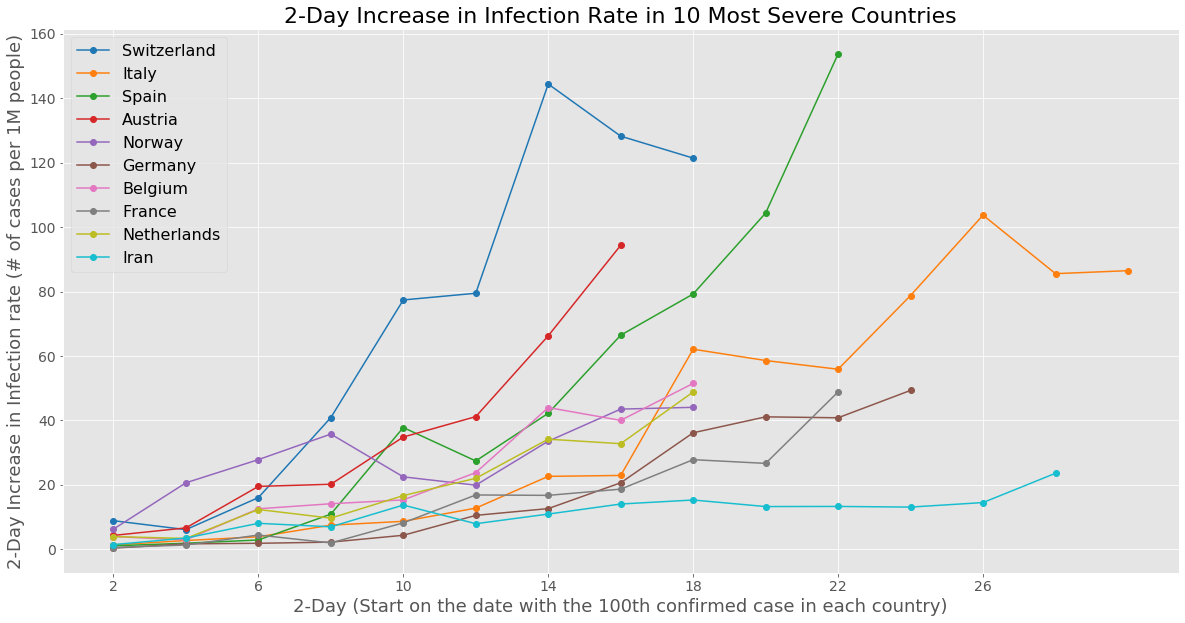

In [179]:
## Top 10 countries plot
top_country_list = list(pd.DataFrame(top_country(jhu_data_process_date_top(df), 20), )[0:10].index)

def create_trend_line_infection_rate_2day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    # color (must put before the plotting!)
    NUM_COLORS = 10
    cm = plt.get_cmap('tab10')
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    # plotting
    tmp_df[country].plot(ax=ax, marker='o')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Day (Start on the date with the 100th confirmed case in each country)', fontsize=18)
    plt.ylabel('2-Day Increase in Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
#     plt.xticks(np.arange(14), [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])
    plt.xticks(np.arange(14), [2, 6, 10, 14, 18, 22, 26])
    plt.locator_params(axis='x', nbins=7)
    return 

create_trend_line_infection_rate_2day(data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df), 100)),
                                     top_country_list, 
                                 '2-Day Increase in Infection Rate in 10 Most Severe Countries')

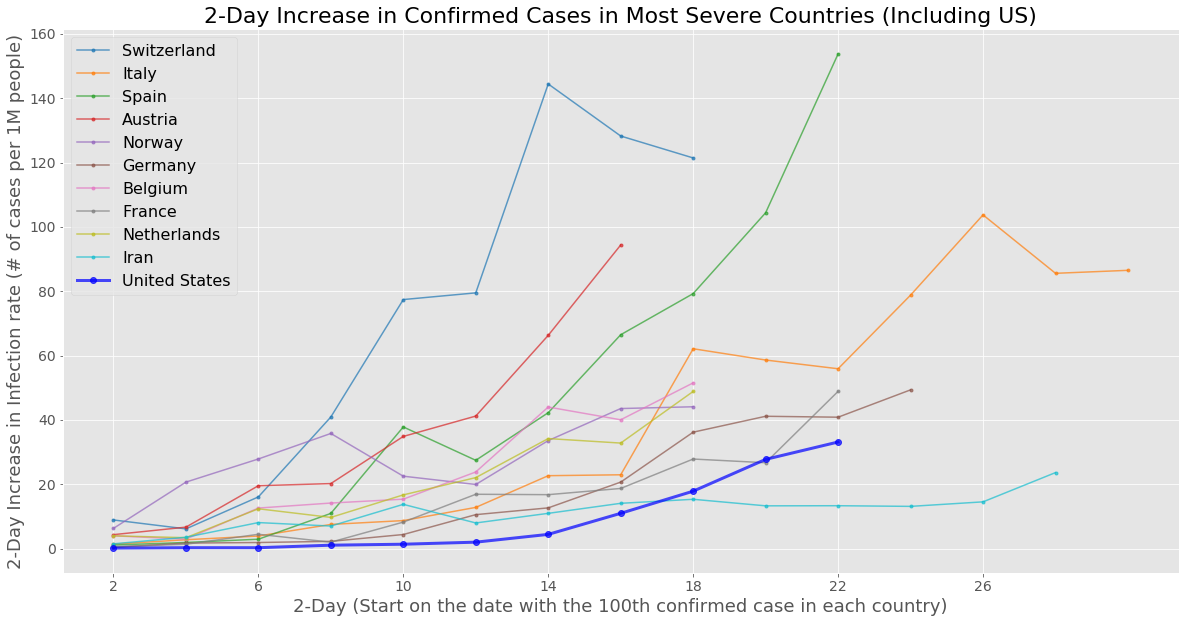

In [180]:
## Top 10 countries plot plus US
# top_country_list = list(pd.DataFrame(top_country(jhu_data_process_date_top(df), 20), )[0:10].index)

def create_trend_line_infection_rate_2day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    # color (must put before the plotting!)
    NUM_COLORS = 10
    cm = plt.get_cmap('tab10')
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    # plotting
    tmp_df[country].plot(ax=ax, marker='.', alpha=0.7)
    # highlight
    tmp_df['United States'].plot(color='blue', linewidth=3, marker='o',alpha=0.7)
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Day (Start on the date with the 100th confirmed case in each country)', fontsize=18)
    plt.ylabel('2-Day Increase in Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
#     plt.xticks(np.arange(14), [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])
    x_range = [n for n in range(2,30) if (n+2) % 4 == 0] # [2, 6, 10, 14, 18, 22, 26]
    plt.xticks(np.arange(14), x_range)
    plt.locator_params(axis='x', nbins=7)
    return 

create_trend_line_infection_rate_2day(data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df), 100)),
                                     top_country_list, 
                                 '2-Day Increase in Confirmed Cases in Most Severe Countries (Including US)')


In [184]:
## rank based on Growth rate?


# pd.DataFr
f = pd.DataFrame({'angles': [2, 3, 4],
                   'degrees': [360, 180, 360]},
                  index=['circle', 'triangle', 'rectangle'])
f
f.div(2).mul(100)


,angles,degrees
circle,100.0,18000.0
triangle,150.0,9000.0
rectangle,200.0,18000.0
